### K-means Clustering

K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

Here, we will show you how to estimate the best value for K using the elbow method, then use K-means clustering to group the data points into clusters.

### How does it work?

First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing. See the "Convergence of k-means" animation at https://en.wikipedia.org/wiki/K-means_clustering.

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "elbow" and is a good estimate for the best value for K based on our data.

As an example, start by visualizing some data points.

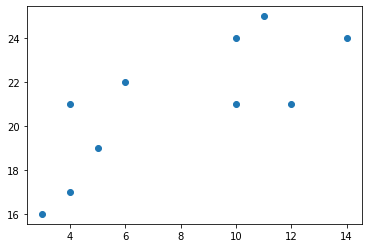

In [3]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

Now we utilize the elbow method to visualize the intertia for different values of K. 

In order to find the best value for K, we need to run K-means across our data for a range of possible values. We only have 10 data points, so the maximum number of clusters is 10. So for each value K in range(1,11), we train a K-means model and plot the intertia at that number of clusters:

C:\Users\tufan.ekin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


inertias are: [218.9, 56.4, 32.86666666666667, 19.0, 10.666666666666668, 6.5, 4.0, 2.0, 1.0, 0.0]


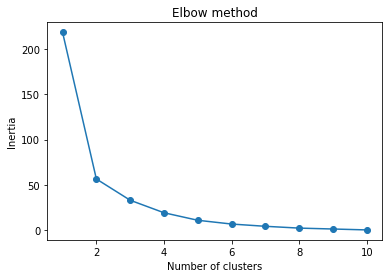

In [12]:
from sklearn.cluster import KMeans

data = list(zip(x, y)) # Turn the data into a set of points
#print (data)

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i) # KMeans function has the n_clusters parameter which has the type of int and a default value of 8.
                                  # n_clusters is the number of clusters to form as well as the number of centroids to generate.
        
    kmeans.fit(data)              # fit function computes k-means clustering.
    
    inertias.append(kmeans.inertia_) # KMeans function has the inertia_ parameter which has the type of float. 
                                     # inertia_ is the sum of squared distances of samples to their closest cluster center, 
print ("inertias are:", inertias)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow method shows that 2 for the number of clusters is a good value for K. Because, 2 is the point at which inertia starts decreasing linearly. Before the value of 2, inertia decreases vertically (in a very fast way) not linearly. This point (2) is referred to as the "elbow" and is a good estimate for the best value for K based on our data.

We can see that the "elbow" on the graph above (where the interia becomes more linear) is at K=2. We can then fit our K-means algorithm one more time and plot the different clusters assigned to the data.

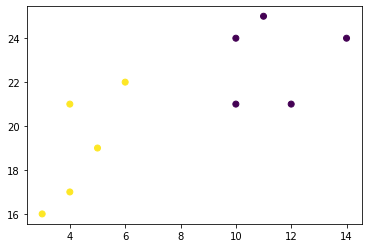

In [13]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_) # c is the marker colors. kmeans.labels_ means labels of each point in kmeans clustering
plt.show()